### 5

In [1]:
import numpy as np

# Define matrix A (example with m > n)
A = np.array([[1, 2], [3, 4], [5, 6]])

# Compute the pseudoinverse of A
A_p = np.linalg.pinv(A)

# Compute A^+ A
A_p_A = A_p @ A

# Compute A A^+
A_A_p = A @ A_p

# Display the results
print("A^+ A = \n", A_p_A)

print("A A^+ = \n", A_A_p)


A^+ A = 
 [[ 1.00000000e+00 -8.88178420e-16]
 [ 1.77635684e-15  1.00000000e+00]]
A A^+ = 
 [[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]


### 8

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m = 500
t = np.linspace(0, 2 * np.pi, m)

# (a) A_beta matrix for fitting c1 + c2*sin(t) + c3*cos(beta*t)
def A_beta(beta, t):
    return np.stack([np.ones_like(t), np.sin(t), np.cos(beta * t)], axis=1)

def condition_number(A):
    return np.linalg.cond(A.T @ A) ** 0.5

beta_values = [1 + 10**k for k in range(0, -9, -1)]

cond_numbers_a = []
for beta in beta_values:
    A = A_beta(beta, t)
    cond_numbers_a.append(condition_number(A))

print("Condition numbers for (a):")
for beta, cond_num in zip(beta_values, cond_numbers_a):
    print(f"beta = 1 + {beta-1:.0e}, kappa = {cond_num:.6e}")


Condition numbers for (a):
beta = 1 + 1e+00, kappa = 1.415636e+00
beta = 1 + 1e-01, kappa = 1.666699e+00
beta = 1 + 1e-02, kappa = 1.434082e+00
beta = 1 + 1e-03, kappa = 1.416719e+00
beta = 1 + 1e-04, kappa = 1.415653e+00
beta = 1 + 1e-05, kappa = 1.415636e+00
beta = 1 + 1e-06, kappa = 1.415636e+00
beta = 1 + 1e-07, kappa = 1.415636e+00
beta = 1 + 1e-08, kappa = 1.415636e+00


In [3]:
# (b) A_beta matrix for fitting c1 + c2*sin^2(t) + c3*cos^2(beta*t)
def A_beta_b(beta, t):
    return np.stack([np.ones_like(t), np.sin(t)**2, np.cos(beta * t)**2], axis=1)

cond_numbers_b = []
for beta in beta_values:
    A = A_beta_b(beta, t)
    cond_numbers_b.append(condition_number(A))

print("Condition numbers for (b):")
for beta, cond_num in zip(beta_values, cond_numbers_b):
    print(f"beta = 1 + {beta-1:.0e}, kappa = {cond_num:.6e}")


Condition numbers for (b):
beta = 1 + 1e+00, kappa = 4.371332e+00
beta = 1 + 1e-01, kappa = 9.460273e+00
beta = 1 + 1e-02, kappa = 8.594765e+01
beta = 1 + 1e-03, kappa = 8.511537e+02
beta = 1 + 1e-04, kappa = 8.503432e+03
beta = 1 + 1e-05, kappa = 8.502618e+04
beta = 1 + 1e-06, kappa = 8.502225e+05
beta = 1 + 1e-07, kappa = 8.489144e+06
beta = 1 + 1e-08, kappa = 4.650905e+07


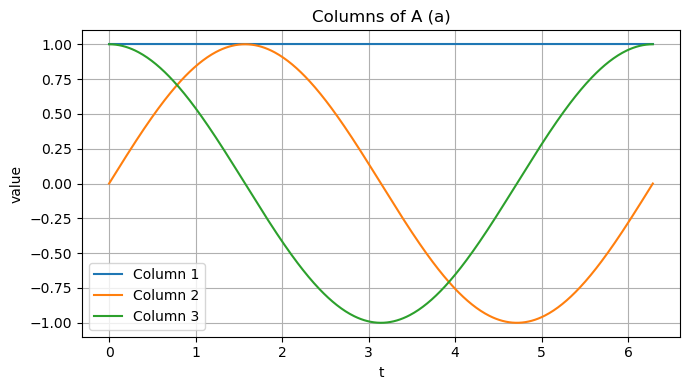

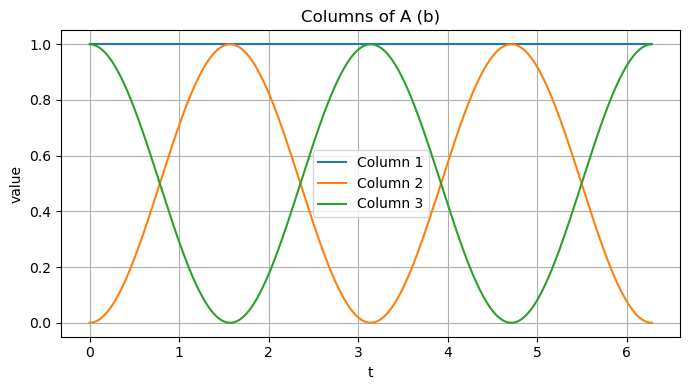

In [4]:
# (c) The columns of A from c_1 + c_2 sin^2(t) + c_3 cos^2(beta t) would be linear dependent
A = A_beta(1+1e-8, t)

plt.figure(figsize=(7, 4))
for j in range(3):
    plt.plot(t, A[:, j], label=f'Column {j+1}')
plt.xlabel('t')
plt.ylabel('value')
plt.title('Columns of A (a)')
plt.legend()
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

A_b = A_beta_b(1+1e-8, t)

plt.figure(figsize=(7, 4))
for j in range(3):
    plt.plot(t, A_b[:, j], label=f'Column {j+1}')
plt.xlabel('t')
plt.ylabel('value')
plt.title('Columns of A (b)')
plt.legend()
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### 9

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def compute_pseudoinverse(A):
    return np.linalg.pinv(A)

def create_A_s(s):
    return np.array([[1, 1], [0, 0], [0, s]])

A_0 = create_A_s(0)

A_0_plus = compute_pseudoinverse(A_0)

s_values = [10**k for k in range(0, -9, -1)]
A_s_plus_values = []

for s in s_values:
    A_s = create_A_s(s)
    A_s_plus = compute_pseudoinverse(A_s)
    A_s_plus_values.append(A_s_plus)

print("Pseudoinverse of A_0 (s=0):")
print(A_0_plus)

# Compare A_0+ and the limit of A_s+ as s approaches 0
print("Limit of A_s+ as s approaches 0 (last computed value):")
for A_s_plus in A_s_plus_values:
    print(A_s_plus)


Pseudoinverse of A_0 (s=0):
[[0.5 0.  0. ]
 [0.5 0.  0. ]]
Limit of A_s+ as s approaches 0 (last computed value):
[[ 1.00000000e+00  0.00000000e+00 -1.00000000e+00]
 [-1.11022302e-16  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -1.00000000e+01]
 [-1.66533454e-16  0.00000000e+00  1.00000000e+01]]
[[   1.    0. -100.]
 [   0.    0.  100.]]
[[ 1.e+00  0.e+00 -1.e+03]
 [ 0.e+00  0.e+00  1.e+03]]
[[ 1.e+00  0.e+00 -1.e+04]
 [ 0.e+00  0.e+00  1.e+04]]
[[ 1.00000000e+00  0.00000000e+00 -1.00000000e+05]
 [-2.22044605e-16  0.00000000e+00  1.00000000e+05]]
[[ 1.00000000e+00  0.00000000e+00 -1.00000000e+06]
 [-1.11022302e-16  0.00000000e+00  1.00000000e+06]]
[[ 1.00000000e+00  0.00000000e+00 -1.00000000e+07]
 [ 1.11022302e-16  0.00000000e+00  1.00000000e+07]]
[[ 1.e+00  0.e+00 -1.e+08]
 [ 0.e+00  0.e+00  1.e+08]]
